## Climate Change - A compulsory subject in the syllabus?

## Introduction

Climate change has been a major concern in recent times due to the detrimental effects of industrial revolution and even more from the technological boom since late 1990s. Today, we not only hear about the many extremities of climate change around the world but also the natural disasters. One major effect as well as a reason is the Global Warming.

Many organizations, associations, even people in art and science are working together to spread awareness and working to take concisous efforts and steps to not only curb this rise in temperature and melting glacier belts but also build a sustainable future for not just our successors but also heed to a better economic and social growth worldwide.

From our initial research, we Carbon emissions have been known to be the major concern of pollution and raising temperatures. In our project, we compare and analyze the correlation between these two phenomena using Granger causality test along with forecasting how the trend of raising temperatures are going to be if the current situation continues using data-driven time series forecasting models. 

## Data 

We have built analysis and forecasts on two datasets. 
1. The GISS Surface Temperature estimates from NASA:
   This dataset provides the estimates of global surface temperature change for both land and sea. These temperature   estimates are sourced and calculated from the recordings of the GBL SST - Global Metop Sea Surface Temperature.
   The dataset is available monthly and the date range for this project is Jan-1880 to Jul-2019. 
   These temperature changes are more technically called anomalies. When it comes to analyzing climate change or raising temperatures, it is more suitable to utilize the anomalies than the actual recordings and therefore the choice to go ahead with these estimates rather than the actual temperature recordings. The temperature estimates are in Degree Celcius metrics.
   
   
2. Carbon Dioxide Emission estimates from WorldBank:
   This data is sourced from the U.S. Department of Energy's Carbon Dioxide Information Analysis Center. Carbon dioxide as a gas occurs naturally as well. It is among the gases that keeps the Earth's radiative balance. But it also has anthropogenic origins majorly through fossil-fuel combustion, biomass burning and a variety of industrial processes. This has lead to Carbon dioxide having the largest share among the greenhouse gases in terms of emissions that are the main cause of global warming. The data used here are estimates of Carbon emissions from the largest anthropogenic emissionsof fossil fuel combustion and world cement manufacturing. For our project we use the annual recordings for each country from 1960-2018. The emissions values provided are per capita for uniformity in a worldwide dataset and measured in metric tonnes.  

## Data wrangling

In [113]:
import pandas as pd
import numpy as np
import fbprophet

import matplotlib.pyplot as pyplot

After importing the necessacry libraries, we read the two datasets using pandas.read_csv(). The files have some headings that can be ignored for analysis and hence, we use the parameter skiprows.

In [114]:
# Read in the raw temperature and emissions datasets (they are in CSV format) 
df_temp = pd.read_csv('NASA_surf_temp_data.csv', skiprows=1)
df_em = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv', skiprows=3)

In [115]:
df_temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-0.09,-0.16,-0.23,-0.2,-0.23,-0.19,-0.11,-0.18,-0.14,-0.18,-0.20
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-0.03,-0.14,-0.21,-0.22,-0.11,-0.10,-0.11,-0.18,0.03,-0.10,-0.19
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-0.06,-0.1,-0.25,-0.16,-0.25,-0.11,-0.10,0.06,-0.10,-0.17,-0.17
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-0.15,-0.21,-0.14,-0.22,-0.16,-0.19,-0.20,-0.32,-0.17,-0.12,-0.19
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-0.26,-0.27,-0.24,-0.3,-0.29,-0.29,-0.28,-0.13,-0.39,-0.34,-0.27


The temperature dataset not only provides the monthly estimates, but also the seasonal anomalies of every year.

In [116]:
df_em.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN,NaN


Now we need to perform some data wrangling steps in order to transform the raw data into a dataframe with date index and handle missing values if any. 
For the temperature estimates, we generate an empty dataset with date range for last day of each month as index as shown below:

In [117]:
# Create new dataframe with an index for each month
# First create the date range
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')

type(date_rng[0])
### returns 
### pandas._libs.tslibs.timestamps.Timestamp

# Next create the empty DataFrame, which we will populate using the actual data
t = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
t['Avg_Anomaly_deg_C'] = None

# Set the index of the DataFrame to the date column (DateTime index)
t.set_index('date', inplace=True)

# Show the first few elements
t.head()


,Avg_Anomaly_deg_C
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


The df_temp dataset, that is the original dataset, as mentioned before, has seasonal estimates, which we will not require in the time series analysis later, so we select only the monthly data:

In [118]:
#only select monthly data and leave out the seasonal columns 
_temp = df_temp.iloc[:,:13]
_temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-0.09,-0.16,-0.23,-0.2,-0.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-0.03,-0.14,-0.21,-0.22,-0.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-0.06,-0.1,-0.25,-0.16,-0.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-0.15,-0.21,-0.14,-0.22,-0.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-0.26,-0.27,-0.24,-0.3,-0.29


Now we define a function to populate the empty dataframe. In this function, we use the row and month index to build the date of last day of that month with calendar and datetime package. Using lambda, the dataframe is populated by match the index value.  

In [119]:

# Import relevant libraries
import calendar
from datetime import datetime

# Function definition
def populate_anomolies_from_row(row):
    year = row['Year']
    # Anomaly values (they seem to be a mixture of strings and floats)
    monthly_anomolies = row.iloc[1:]
    # Abbreviated month names (index names)
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        # Get the last day for each month 
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        # construct the index with which we can reference our new DataFrame (to populate) 
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        # Populate / set value @ above index, to anomaly value
        t.loc[date_index] = monthly_anomolies[month]

# Apply function using lambda 
_ = _temp.apply(lambda row: populate_anomolies_from_row(row), axis=1)

t.head()


,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [120]:
# Import Numpy, as library meant for large arrays - we will use it that we 
import numpy as np

# Define function to convert values to floats, and return a 'NaN = Not a Number' if this is not possible
def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
    
# Apply above function to all anomaly values in DataFrame
t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))

# 'Forward fill' to take care of NaN values
t.fillna(method='ffill', inplace=True)

# Show the first few elements of our newly cleaned DataFrame
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


We also perform data wrangling on Emissions data. 
Here we first filter columns for the required ones-Country_name and the years from 1960-2018. 
Next this dataframe is transposed. Now for the emissions data to be consistent with temperature data, we build a dataframe with last of each month as index for the dates ranging from 31/12/1960 to 31/12/2018.  

In [121]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  
# Select just the co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_world = df_em[df_em['Country Name']=='World'].loc[:,'1960':'2018']

# 'Traspose' the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']

#to match the temperature dataframe format
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])

# Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


For missing values in this data which is prevelant after 2011, we use forward filling so that the values are more continuous temporally as it is with time series.   

In [122]:
# Illustrate how the above DataFrame can be filtered for values after 2011
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,NaN
2016-12-31,NaN
2017-12-31,NaN
2018-12-31,NaN


In [123]:
# Deal with the NaNs by 'forward filling'
e.fillna(method='ffill', inplace=True)
# Check that there are no longer NaNs at the end 
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,4.980707
2016-12-31,4.980707
2017-12-31,4.980707
2018-12-31,4.980707


## Exploratory data analysis

##### 1. Seasonal Temprature anomalies 

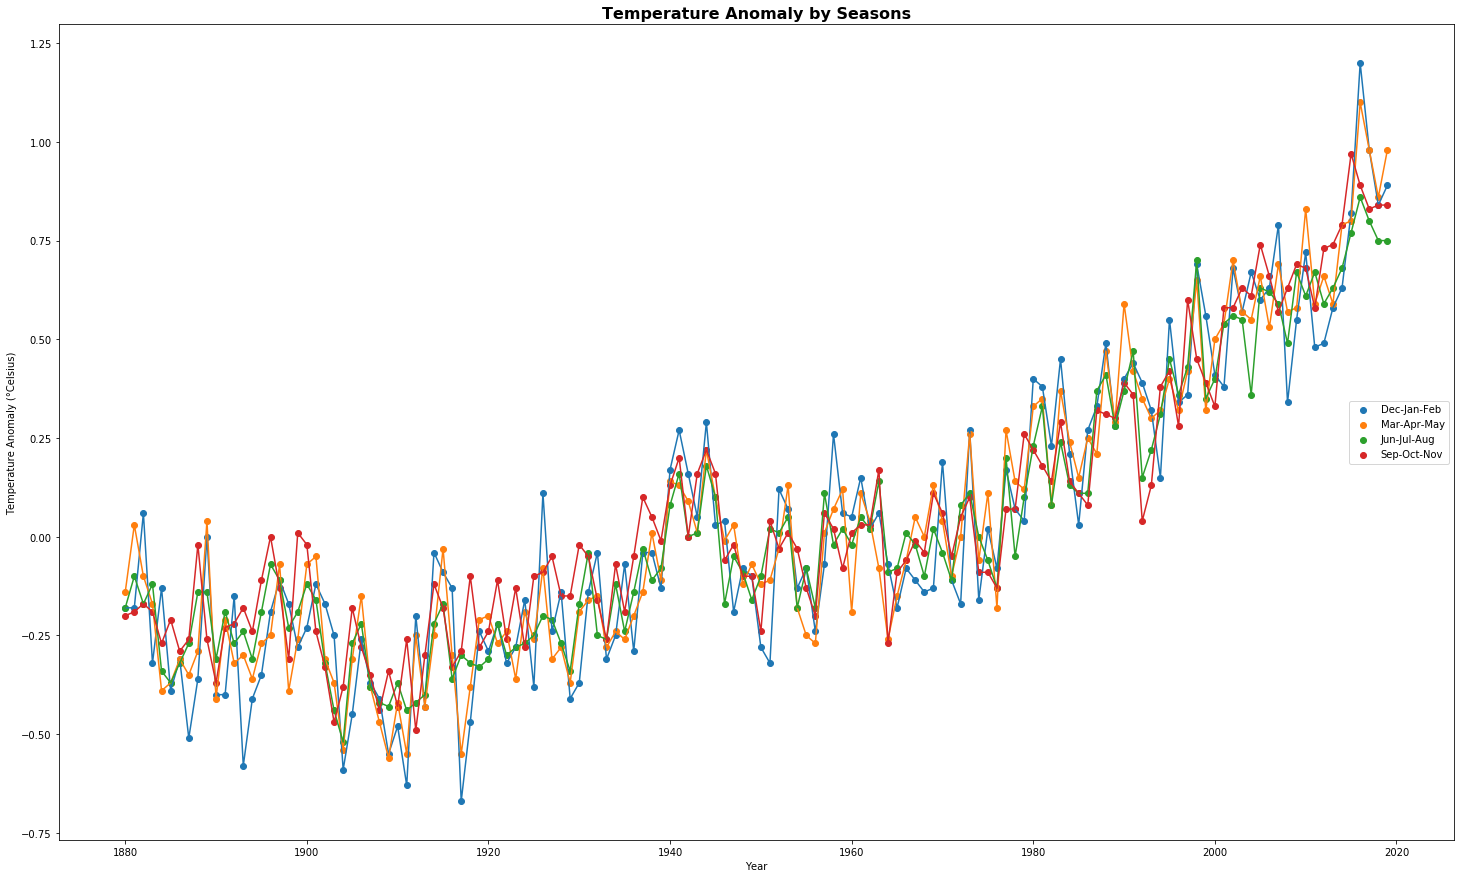

In [124]:
pyplot.figure(figsize=(25,15))


pyplot.title("Temperature Anomaly by Seasons", fontsize=16, fontweight='bold')

pyplot.scatter(df_temp['Year'],df_temp['DJF'].astype(float),label= 'Dec-Jan-Feb')
pyplot.plot(df_temp['Year'],df_temp['DJF'].astype(float))

pyplot.scatter(df_temp['Year'],df_temp['MAM'].astype(float), label = 'Mar-Apr-May')
pyplot.plot(df_temp['Year'],df_temp['MAM'].astype(float))

pyplot.scatter(df_temp['Year'],df_temp['JJA'].astype(float),label='Jun-Jul-Aug')
pyplot.plot(df_temp['Year'],df_temp['JJA'].astype(float))

pyplot.scatter(df_temp['Year'],df_temp['SON'].astype(float),label='Sep-Oct-Nov')
pyplot.plot(df_temp['Year'],df_temp['SON'].astype(float))

pyplot.xlabel('Year')
pyplot.ylabel('Temperature Anomaly (°Celsius)')
pyplot.legend(loc='right')
pyplot.show()



We have plotted the seasonal anomaly estimates provided in the dataset as DJF,MAM,JJA and SON depicting, winter,spring, summer and fall. From the multi-series line plot, it is clear that there has been an less or not much anomaly until 1960 but after 1960 the changes have a steep slope and rapid too. For example, the lower temperature changes for winter between 2000-2020 are in much higher temperatures than they for the highest anomalies between 1940-1960. 

In [125]:
# import pandas as pd
# import numpy as np
# from pandas import melt

# df = pd.DataFrame(np.random.randint(10, 1000, size=(1, 1668)), index=['Anamolies'],
#                   columns=pd.date_range(start='1/1/1880', end='1/03/2019', freq='M'))

# dft = df.T
# dft["date"] = dft.index
# result = melt(dft, id_vars=["date"])
# result.columns = ["date", "random_col", "random_values"]
# result.head()


##### 2. Global Surface Temperature Anomaly Trend 

For the plot, we leverage the statsmodels package for lowess smoothing. This helps in observing the general overall trend of the data over a fraction along the timeline. It is very similar to a moving average and the smoothing window chosen here is 1/10th or the smoothing performed over a window of 10 years.   

In [126]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
# z = lowess(y, x, frac= 1./3, it=0)
# w = lowess(t['Avg_Anomaly_deg_C'],range(len(t['Avg_Anomaly_deg_C'])), frac=1./3)

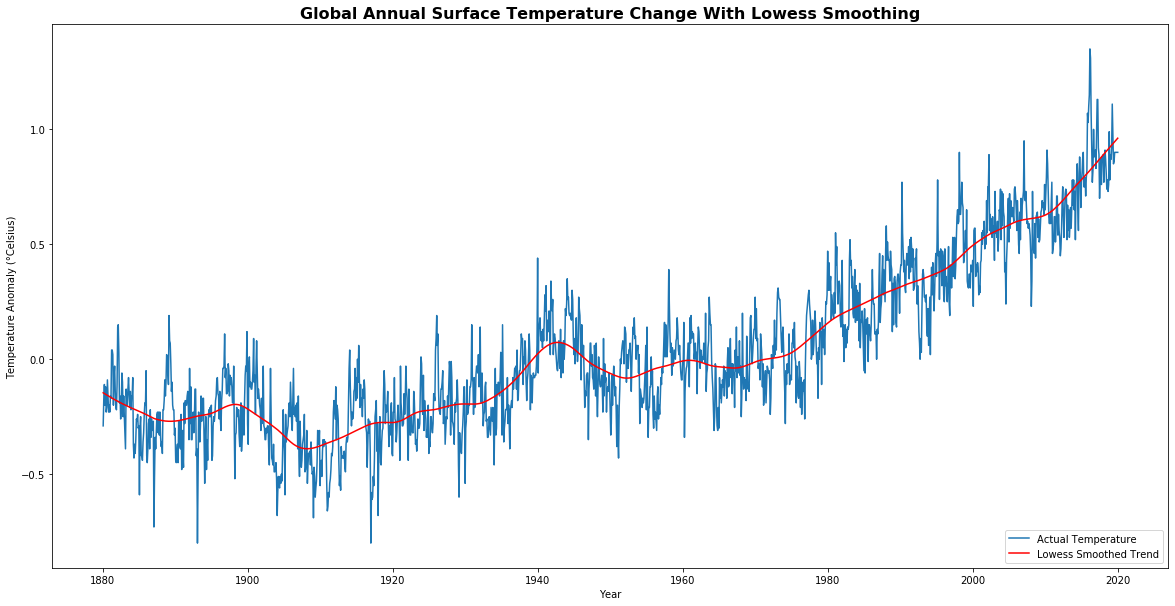

In [127]:
#Lowess smoothing
def filter(ts):
    temp = lowess(ts, range(len(ts)), is_sorted=True, frac=0.1, it=0)
    return temp[:, 1]
# w= filter(t['Avg_Anomaly_deg_C'])
# ts=t.resample('A').mean()
w=filter(t['Avg_Anomaly_deg_C'])

#plot
pyplot.figure(figsize=(20,10))
pyplot.xlabel('Year')
pyplot.ylabel('Temperature Anomaly (°Celsius)')
pyplot.plot(t.index.to_pydatetime(),t['Avg_Anomaly_deg_C'],label='Actual Temperature')
pyplot.plot(t.index.to_pydatetime(),w,color='Red', label='Lowess Smoothed Trend')
pyplot.legend(loc='lower right')
pyplot.title("Global Annual Surface Temperature Change With Lowess Smoothing", fontsize=16, fontweight='bold')

pyplot.show()



From this plot we can observe that while the temperature changes fell in the beginning before 1940, and except the odd spike in anomalies between 1940 and 1960, the temperature has almost linearly increased since after 1960 and almost a steeply indicating a rapid change.  

In [20]:
# The data can be resampled to a different frequency, 
# lets resample it to years (end-of-year):
t.resample('A').mean().head()

,Avg_Anomaly_deg_C
date,
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


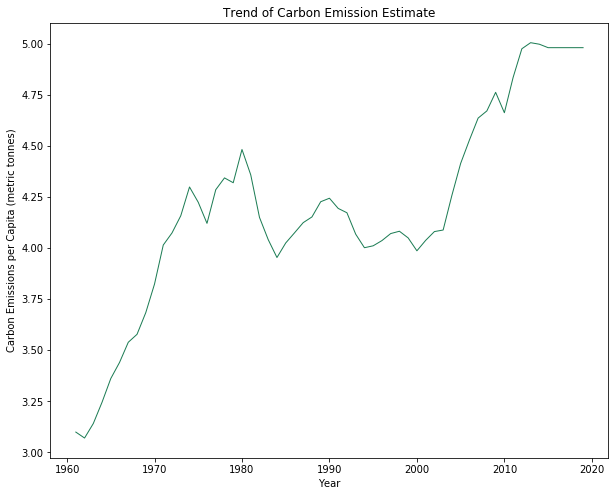

In [190]:
pyplot.figure(figsize=(10,8))
pyplot.xlabel('Year')
pyplot.ylabel('Carbon Emissions per Capita (metric tonnes)')
pyplot.title('Trend of Carbon Emission Estimate')
pyplot.plot(e, color='#1C7C54', linewidth=1.0)

While a great milestone was achieved in the 1960s, with man landing on the moon for the first time, it also saw the beginning of another rapid growth, growth in industrialization and globalisation leading to greater Carbon emissions that has seen no decrease except a drop between 1980-1990. Post the technological boom near mid 1990s,Carbon emissions has seen a very steep increase going from 4 to 5 very rapidly.  

##### 3. Annual Carbon Emmissions and Surface Temperature Estimates (1960-2018)

The surface temperature estimates and the carbon emissions have not only different scales and metric units but also different time series. Before scaling, first the temperature estimates were calculated annually with resample() and mean().  

In [129]:
temp_plot = t['1960-12-31':'2018-12-31']
temp_plot=temp_plot.resample('A').mean()
temp_plot.head()

,Avg_Anomaly_deg_C
date,
1960-12-31,0.180000
1961-12-31,0.055833
1962-12-31,0.038333
1963-12-31,0.069167
1964-12-31,-0.197500


Using MinMaxScalar() the resmapled temperature and emissions values were scaled between 0 and 1.  

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
plotemp_scale= sc.fit_transform(temp_plot)
plotemis_scale= sc.fit_transform(e)

In [47]:
df_temp_plot = temp_plot
df_temp_plot['temp'] = plotemp_scale
df_temp_plot['emm'] = plotemis_scale
df_temp_plot.drop(columns=['Avg_Anomaly_deg_C'],axis=1,inplace=True)

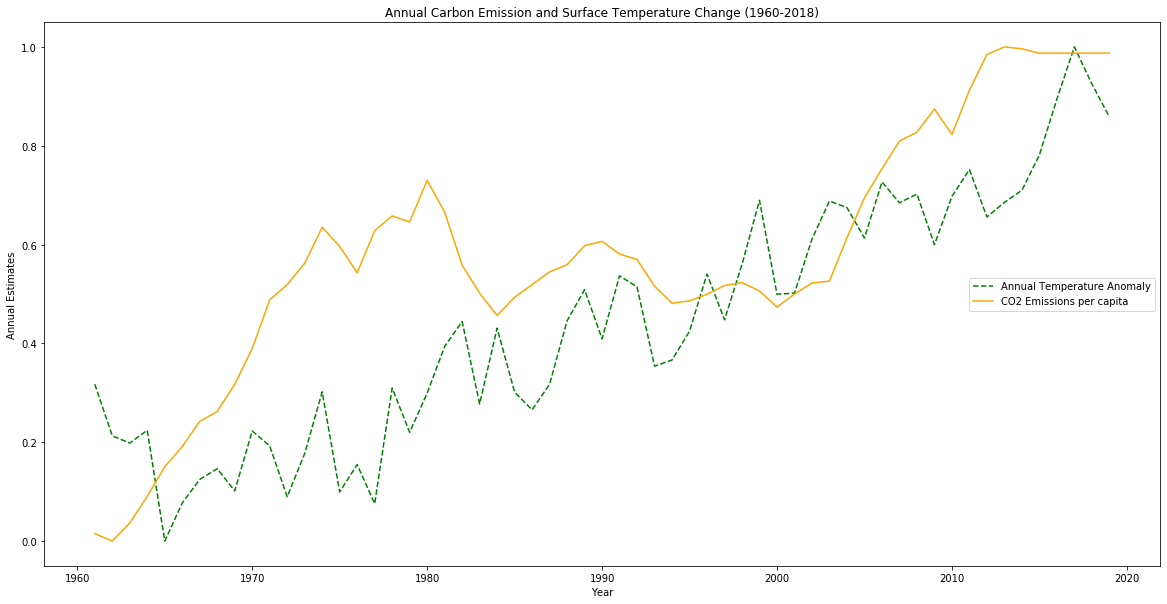

In [131]:
pyplot.figure(figsize=(20,10))
pyplot.plot(df_temp_plot.index.values,df_temp_plot['temp'],'g--',label='Annual Temperature Anomaly')
pyplot.plot(df_temp_plot.index.values,df_temp_plot['emm'],'orange',label='CO2 Emissions per capita')
pyplot.xlabel('Year')
pyplot.ylabel('Annual Estimates')
pyplot.title('Annual Carbon Emission and Surface Temperature Change (1960-2018)')
pyplot.legend(loc='right')

From the plot we can see that the trends are moving in harmony together and increasing. So far with the plot we can deduce that carbon emissions increase can have a strong correlation to the temperature rise.  

## Analysis

In [27]:
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


In [28]:
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


### NAIVE BAYES

First, let us see how the predict how high can the emissions be in 2020.   

For this analysis, we use the Naive Bayes algorithm. Since emission estimates are continuous values, we define the degree of emissions on the discrete scale of 1 to 4 , with 1 being low and 4 being the highest.  

Naive Bayes is a proababilistic classifier that has its roots in the Bayes Theorem:


which is the probabilty of an A event occurring given the probability of another B event has occurred. Here, P(B) event is the evidence, P(B|A) is the conditional probability and P(A) is the priori.

P(B|A) is the probability that shows what is the possibility of B event being an attribute of A event. It shows what is the dependence of the evidence on the A event.   

P(A) is the probability before the introduction of the condition of B event or it is the probability of A regardless

It is called "naive" bayes theorem because of the strong assumptions about the features in case of multivariate datasets that all features are independent of each other and that they make equal contributions towards the target.

In our emissions timeseries, we train the model on year and CO2 emissions estimates. We have 58 years annual estimates and so we train the naive bayes model on 53 years of estimates and test on 7 years. 

In [139]:
e_naive = e.reset_index()
e_naive['degree_of_emm'] = e_naive['Global CO2 Emissions per Capita']
# e_naive['Global CO2 Emissions per Capita'].max()
# e_naive['Global CO2 Emissions per Capita'].min()


def max_min_emm(df):
    if (df['degree_of_emm'] >= 3) & (df['degree_of_emm'] < 3.5):
        return '1'
    if (df['degree_of_emm'] >= 3.5) & (df['degree_of_emm'] < 4):
        return '2'
    if (df['degree_of_emm'] >= 4) & (df['degree_of_emm'] < 5):
        return '3'
    else:
        return '4'
    return
    

# e_naive['degree_of_emm'] = max_min_emm(e_naive)
e_naive['degree_of_emm'] = e_naive.apply(lambda df: max_min_emm(df), axis = 1)

e_naive['year'] = pd.DatetimeIndex(e_naive['date']).year

# e_naive.date = e_naive.date.dt.strftime('%Y-%m-%d')

# e_naive.tail()

# e_naive.info()

e_train = e_naive.head(53)
e_test = e_naive[53:]



In [144]:
X = e_train[['year','Global CO2 Emissions per Capita']] # X is the features in our dataset
y = e_train[['degree_of_emm']]   # y is the Labels in our dataset

X_test = e_test[['year','Global CO2 Emissions per Capita']]
y_test = e_test[['degree_of_emm']]

from sklearn.naive_bayes import ComplementNB

model = ComplementNB().fit(X, y) #fitting our model

predicted_y = model.predict(X_test) #now predicting our model to our test dataset

from sklearn.metrics import accuracy_score

# now calculating that how much accurate our model is with comparing our predicted values and y_test values
accuracy_score = accuracy_score(y_test, predicted_y) 
print (accuracy_score)

# Create an empty dataframe that we have to predict 
em_future = pd.DataFrame()

# Create some feature values for this single row
em_future['year'] = [2020]
em_future['Global CO2 Emissions per Capita'] = [4.5]

# View the data 
em_future

# the data is stored in Datadrame person
predicted_y = model.predict(em_future)
print(predicted_y)

1.0
['3']


C:\Users\iyeng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



For the year 2020 if the emission estimates is 4.5, our model rightly classifies it as degree 3 which is High. 

### Stationarity Test and Conversion with differencing

While some of the Machine Learning algorithms we have used in this project can handle seasonality and train well even on non-stationary time series data, it is important to remove trends and seasonality in others so that we remove the variance or autocovariances in data are independent of time. This is also applies to the mean of the time series distribution. 
We check for stationarity using ADF test.

#### Augmented Dicker-Fuller Test
The ADFuller performs a unit root null hypothesis testing.The null hypothesis is that the data is stationery and the alternate hypoothesis is unit root is non-stationary. 
The adfuller of statsmodels in Python, gives the result in ADF Statistic, p-Value and critical values. 


In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
data1 = t.iloc[:,0].values
data1

array([-0.29, -0.18, -0.11, ...,  0.9 ,  0.9 ,  0.9 ])

Applying the ADF Stationarity test to Temperature estimates data. 

In [32]:
result = adfuller(t.Avg_Anomaly_deg_C)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.552410
p-value: 0.881377
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


We get the above result. In case of stationary data, ADF Statistic should be lower than the critical values but in our case, it is much higher with a value of -0.55 against -3.4,-2.8 and -2.5. So the global temperature data is non-stationery.

In [145]:
# from statsmodels.tsa.stattools import kpss
# kpsstest = kpss(t.Avg_Anomaly_deg_C)

# kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
# for key,value in kpsstest[3].items():
#     kpss_output['Critical Value (%s)'%key] = value
    
# kpss_output

To make the data stationery, we perform differencing that will help in removing the trend and seasonality. We do this by calculating the timeseries difference between itself and the timeseries with a lag of 1

In [34]:
from matplotlib import pyplot
t_diff = t
diff_t = t.diff()
diff_t.dropna(inplace=True)
diff_t.head()
# pyplot.plot(diff_t)
# pyplot.show()
# tempx = (t['Avg_Anomaly_deg_C'].shift(1))
# t_diff['shift_series'] = tempx
# t_diff.drop(['shift_series'], axis = 1, inplace =True)

,Avg_Anomaly_deg_C
date,
1880-02-29,0.11
1880-03-31,0.07
1880-04-30,-0.09
1880-05-31,0.08
1880-06-30,-0.11


In [ ]:
result = adfuller(diff_t.Avg_Anomaly_deg_C)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

We can see now that it has become stationary. 

Similarly, we perform ADF test on Carbon emissions data and it is found to be non-stationary. 

In [146]:
result = adfuller(e['Global CO2 Emissions per Capita'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.968278
p-value: 0.300653
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595


In [ ]:
# kpsstest = kpss(e['Global CO2 Emissions per Capita'])

# kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
# for key,value in kpsstest[3].items():
#     kpss_output['Critical Value (%s)'%key] = value
    
# kpss_output

We again perform differencing with a lag 1

In [147]:
e_diff = e
diff_e = e.diff()
diff_e.dropna(inplace=True)
diff_e.head()
# pyplot.plot(diff_e)
# pyplot.show()

,Global CO2 Emissions per Capita
date,
1961-12-31,-0.029139
1962-12-31,0.070939
1963-12-31,0.104152
1964-12-31,0.116271
1965-12-31,0.078673


Now the data is stationary.

In [39]:
result = adfuller(diff_e['Global CO2 Emissions per Capita'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.118740
p-value: 0.000013
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595


### Granger Causality Test

Now that the timeseries have become stationery, let us test the correlation between the two using the Granger Causality test. It is especially useful in time series analysis where you have disparate time series and want to test dependence. In our case we will test whether the carbon emissions is a cause for rising temperature and temperature anomalies.  

In [40]:
temp_t = diff_t.resample('A').mean()
temp_t = temp_t.reset_index()
temp_t.tail()

,date,Avg_Anomaly_deg_C
135,2015-12-31,0.027500
136,2016-12-31,-0.022500
137,2017-12-31,0.005000
138,2018-12-31,0.000000
139,2019-12-31,0.000833


In [41]:
temp_e = diff_e
temp_e = temp_e.reset_index()
temp_e.tail()

,date,Global CO2 Emissions per Capita
53,2014-12-31,-0.016892
54,2015-12-31,0.000000
55,2016-12-31,0.000000
56,2017-12-31,0.000000
57,2018-12-31,0.000000


In [42]:
start_date = '1960-12-31'
end_date = '2018-12-31'

mask = (temp_t['date'] >= start_date) & (temp_t['date'] <= end_date)

df_temp_t = temp_t.loc[mask]
df_temp_t = df_temp_t.reset_index(drop=True)
df_temp_t.tail()

,date,Avg_Anomaly_deg_C
54,2014-12-31,0.0100
55,2015-12-31,0.0275
56,2016-12-31,-0.0225
57,2017-12-31,0.0050
58,2018-12-31,0.0000


In [43]:
df_temp_t['emissions'] = temp_e['Global CO2 Emissions per Capita']

In [44]:
df_temp_t.dropna(inplace=True)

The granger causality tests using the F-test and Chi-test for different lags upto 18. We have used the maximum lag for testing the p-values. There were some fluctuations, but overall the test result indicates a strong correlation.  

In [49]:
from statsmodels.tsa.stattools import grangercausalitytests
print(grangercausalitytests(df_temp_t[['Avg_Anomaly_deg_C', 'emissions']], maxlag=18, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9223  , p=0.3412  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=0.9735  , p=0.3238  , df=1
likelihood ratio test: chi2=0.9653  , p=0.3259  , df=1
parameter F test:         F=0.9223  , p=0.3412  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2355  , p=0.7910  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=0.5172  , p=0.7721  , df=2
likelihood ratio test: chi2=0.5148  , p=0.7731  , df=2
parameter F test:         F=0.2355  , p=0.7910  , df_denom=51, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4535  , p=0.7160  , df_denom=48, df_num=3
ssr based chi2 test:   chi2=1.5591  , p=0.6687  , df=3
likelihood ratio test: chi2=1.5374  , p=0.6737  , df=3
parameter F test:         F=0.4535  , p=0.7160  , df_denom=48, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1827  , p=0.3313  , df_d

        0., 0., 0., 1., 0.]])])}


### Seasonal AutoARIMA (S-ARIMA)
AutoRegressive Integrated Moving Average is most widely used for time series forecasting. The traditional ARIMA requires data to be stationery but S-ARIMA can hand non-stationery data as well. 

The difference between the two models is that SARIMA introduces an additional differencing order parameter and internally performance stationerity conversion according to the number of lags provided.  

In [50]:
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


In [51]:
import plotly
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import pandas.plotting

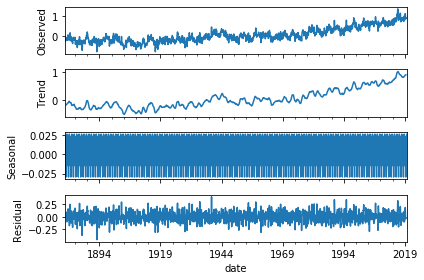

In [52]:
result = seasonal_decompose(t, model='additive')
result.plot()
pyplot.show()

We use the non-stationery data for training. And include the seasonal=True parameter, max_p =3, d=1, max_q=3. m=12 for 12 months.

In [54]:
from pmdarima import auto_arima

stepwise_model = auto_arima(t, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=-2589.444, BIC=-2562.350, Time=16.358 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=-1195.990, BIC=-1185.153, Time=0.885 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=-1980.527, BIC=-1958.852, Time=4.904 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=-2565.649, BIC=-2543.974, Time=12.246 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=-1197.990, BIC=-1192.571, Time=0.195 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=-1514.154, BIC=-1492.479, Time=2.263 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=-2587.970, BIC=-2555.457, Time=22.509 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at le

In [55]:
stepwise_model.aic()

-2592.2841222210964

AIC value should be minimum and it is true here.

From the following plot we can observe that the residual distribution is normal and therefore our model is at its best fit.


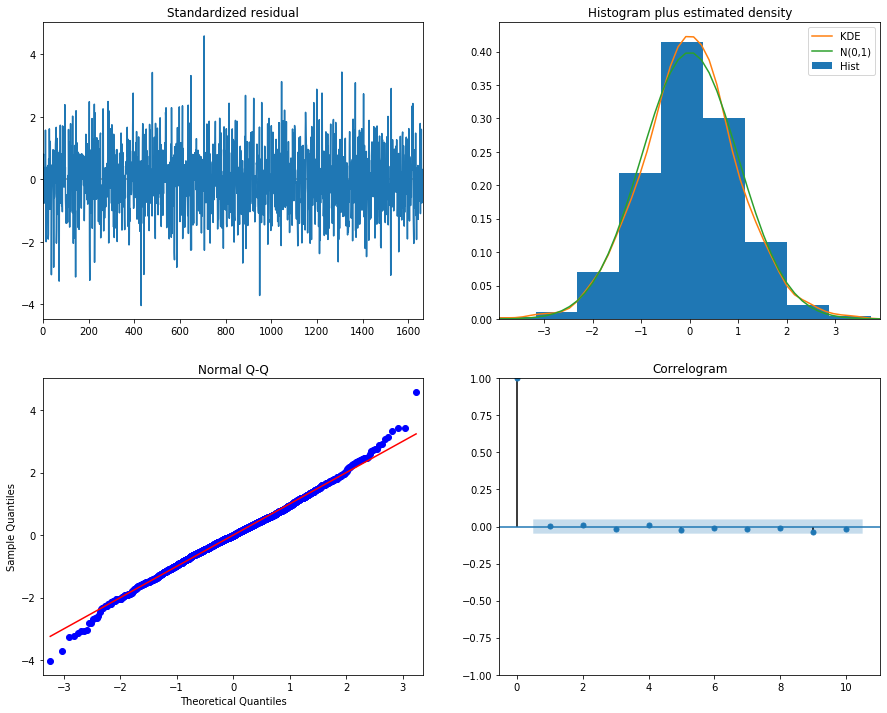

In [57]:
stepwise_model.plot_diagnostics(figsize=(15, 12))
pyplot.show()

In [58]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1680
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                1302.142
Date:                            Fri, 14 Feb 2020   AIC                          -2592.284
Time:                                    12:31:05   BIC                          -2559.771
Sample:                                         0   HQIC                         -2580.236
                                           - 1680                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.861e-06      3e-05      0.262      0.793   -5.09e-05    6.67e-05
ar.L1          0.2707      0.045      5.952      0.000       0.182       0.360
ar.L2          0.0550      0.034      1.622      0.105      -0.011       0.121
ma.L1         -0.7550      0.040    -18.785      0.000      -0.834      -0.676
ma.S.L12      -0.9652      0.007   -144.636      0.000      -0.978      -0.952
sigma2         0.0120      0.000     33.540      0.000       0.011       0.013
===================================================================================
Ljung-Box (Q):                       66.87   Jarque-Bera (JB):                35.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.03
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the above result, we get the best result with (p,d,q)=(2,1,1)

In [59]:
train = t.loc['1880-01-31':'2009-12-31']
test = t.loc['2010-01-31':]

In [60]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

Now we forecast for the next 10 years, that is our test years.

In [62]:
future_forecast = stepwise_model.predict(n_periods=120)


# future_forecast = stepwise_model.predict(, typ="levels").rename("ARIMA Predictions")
# future_forecast

In [63]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

In [64]:
future_forecast.head()

,Prediction
date,
2010-01-31,0.686321
2010-02-28,0.694438
2010-03-31,0.702549
2010-04-30,0.669669
2010-05-31,0.652537


In [65]:
test.head()

,Avg_Anomaly_deg_C
date,
2010-01-31,0.73
2010-02-28,0.79
2010-03-31,0.91
2010-04-30,0.85
2010-05-31,0.73


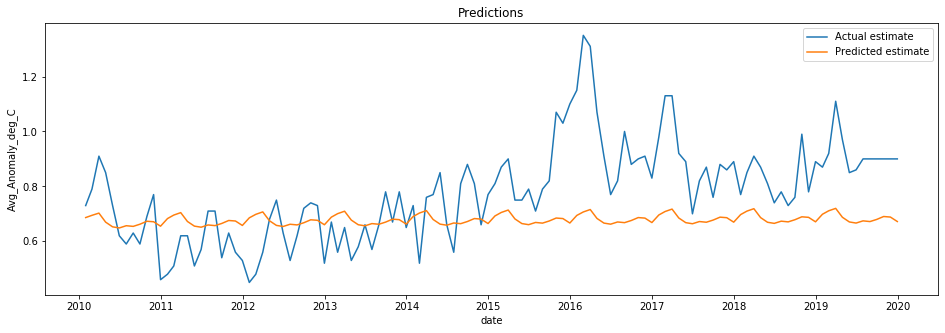

In [153]:
# pyplot.plot(test.Avg_Anomaly_deg_C)
# pyplot.plot(future_forecast.Prediction)
import seaborn as sns
pyplot.figure(figsize=(16,5))
pyplot.title('Predictions')
ax = sns.lineplot(x= test.index, y=test.Avg_Anomaly_deg_C,label='Actual estimate')
pyplot.legend(loc='right')
sns.lineplot(x=test.index, y = future_forecast.Prediction.values, label='Predicted estimate');



In [68]:
from sklearn import metrics
mae = metrics.mean_absolute_error(test.Avg_Anomaly_deg_C,future_forecast.Prediction)
mse = metrics.mean_squared_error(test.Avg_Anomaly_deg_C,future_forecast.Prediction)
rmse = np.sqrt(metrics.mean_squared_error(test.Avg_Anomaly_deg_C,future_forecast.Prediction))


df_error_aa = pd.DataFrame({'MAE' : [mae], 'MSE' : [mse],
                       'RMSE' : [rmse]}, index=[0])
df_error_aa = df_error_aa.melt()
df_error_aa.columns =['Errors','auto_arima']
df_error_aa['auto_arima'] = round(df_error_aa['auto_arima'],3)
df_error_aa

,Errors,auto_arima
0,MAE,0.155
1,MSE,0.038
2,RMSE,0.194


### FBProphet

Facebook's prophet provides high-quality forecasts with the help of parameters that are easy to tune. The time series that can be given as an input to the prophet can be stationary or it can be seasonal, which means it can have a trend. Prophet uses an additive regression model where the non-linear trends are fit easily with yearly, weekly, daily seasonality and the holiday effects. Prophet easily detects the changes in the trends from the data and it uses the Fourier series for the yearly seasonal component of the data. 

Prophet Forecasting:

The Prophet uses a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

y(t)= g(t) + s(t) + h(t) + εt

g(t): piecewise linear or logistic growth curve for modeling non-periodic changes in time series
s(t): periodic changes (e.g. weekly/yearly seasonality)
h(t): effects of holidays (user-provided) with irregular schedules
εt: error term accounts for any unusual changes not accommodated by the model

Prophet uses time as a regressor to fit several linear and non-linear functions of the time as components. For the seasonality, component prophet tries to smoothen the curve by taking the exponential of the time series. With the above equation, the prophet tries to frame the forecast in the ranges from yhat_upper and yhat_lower, with y_hat as the actual predictions. It doesn't look explicitly at the time-based dependence of each observation within a time series.

In [69]:
train = t.loc['1880-01-31':'2009-12-31']
test = t.loc['2010-01-31':]
t_prophet = pd.DataFrame()
t_prophet['ds'] = train.index
t_prophet['y'] = train['Avg_Anomaly_deg_C'].values

In [70]:
from fbprophet import Prophet
m = Prophet()
m.fit(t_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\iyeng\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [71]:
# Make future dataframes
future = m.make_future_dataframe(freq='m', periods=10*12)
forecast = m.predict(future)
#forecast = forecast[['ds','yhat', 'yhat_lower','yhat_upper']]

C:\Users\iyeng\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



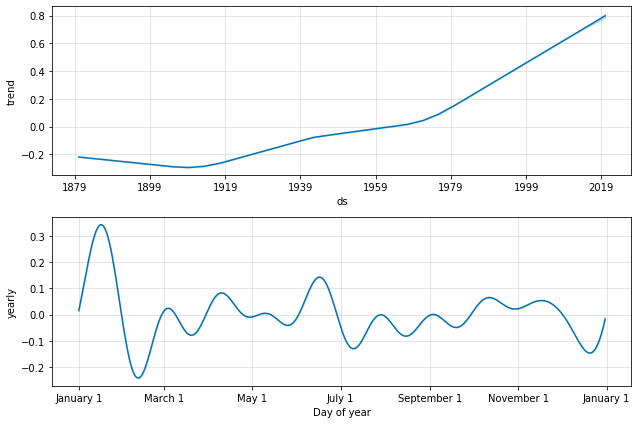

In [154]:
m.plot_components(forecast);

In [155]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1880-01-31,-0.219631,-0.436436,-0.061476,-0.219631,-0.219631,-0.026293,-0.026293,-0.026293,-0.026293,-0.026293,-0.026293,0.0,0.0,0.0,-0.245923
1,1880-02-29,-0.219856,-0.402466,-0.011936,-0.219856,-0.219856,0.016324,0.016324,0.016324,0.016324,0.016324,0.016324,0.0,0.0,0.0,-0.203532
2,1880-03-31,-0.220096,-0.365244,-0.010077,-0.220096,-0.220096,0.028271,0.028271,0.028271,0.028271,0.028271,0.028271,0.0,0.0,0.0,-0.191825
3,1880-04-30,-0.220328,-0.415766,-0.031704,-0.220328,-0.220328,-0.008361,-0.008361,-0.008361,-0.008361,-0.008361,-0.008361,0.0,0.0,0.0,-0.228689
4,1880-05-31,-0.220568,-0.422763,-0.023491,-0.220568,-0.220568,-0.008295,-0.008295,-0.008295,-0.008295,-0.008295,-0.008295,0.0,0.0,0.0,-0.228863


From the forecast dataframe, we are more interested in the 'ds','yhat', 'yhat_lower','yhat_upper' features. Here yhat is the predicted value, yhat_lower and yhat_upper are the lower and upper bounds of the predicted value.

In [73]:
# test_forecast = forecast.loc['2010-01-31':]

start_date = '2010-01-31'
end_date = '2019-12-31'

mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)

test_forecast = forecast.loc[mask]
test_forecast = test_forecast.reset_index(drop=True)
test_forecast = test_forecast[['ds','yhat', 'yhat_lower','yhat_upper']]

In [74]:
test_forecast = test_forecast.set_index('ds')
test_forecast.index = pd.to_datetime(test_forecast.index)
test_forecast.head()

,yhat,yhat_lower,yhat_upper
ds,,,
2010-01-31,0.630510,0.443098,0.828094
2010-02-28,0.644341,0.444990,0.832048
2010-03-31,0.651962,0.461026,0.852669
2010-04-30,0.633330,0.466823,0.832682
2010-05-31,0.622981,0.416681,0.813345


In [75]:
test_forecast = test_forecast[['yhat', 'yhat_lower','yhat_upper']]
test_forecast['yhat_avg'] = (test_forecast.yhat + test_forecast.yhat_upper + test_forecast.yhat_lower)/3
test_forecast.head()

,yhat,yhat_lower,yhat_upper,yhat_avg
ds,,,,
2010-01-31,0.630510,0.443098,0.828094,0.633901
2010-02-28,0.644341,0.444990,0.832048,0.640460
2010-03-31,0.651962,0.461026,0.852669,0.655219
2010-04-30,0.633330,0.466823,0.832682,0.644278
2010-05-31,0.622981,0.416681,0.813345,0.617669


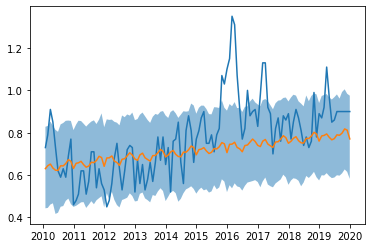

In [77]:
pyplot.plot(test.Avg_Anomaly_deg_C)
pyplot.plot(test_forecast.yhat)

pyplot.fill_between(test_forecast.yhat.index, test_forecast.yhat_lower, test_forecast.yhat_upper,alpha=.5)


In [78]:
mae = metrics.mean_absolute_error(test.Avg_Anomaly_deg_C,test_forecast.yhat)
mse = metrics.mean_squared_error(test.Avg_Anomaly_deg_C,test_forecast.yhat)
rmse = np.sqrt(metrics.mean_squared_error(test.Avg_Anomaly_deg_C,test_forecast.yhat))


df_error_fbp = pd.DataFrame({'MAE' : [mae], 'MSE' : [mse],
                       'RMSE' : [rmse]}, index=[0])
df_error_fbp = df_error_fbp.melt()
df_error_fbp.columns =['Errors','fbprophet']
df_error_fbp['fbprophet'] = round(df_error_fbp['fbprophet'],3)
df_error_fbp

,Errors,fbprophet
0,MAE,0.120
1,MSE,0.025
2,RMSE,0.159


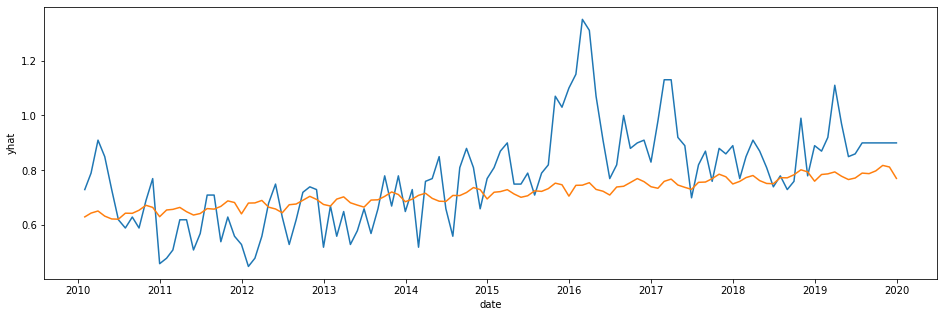

In [79]:
import seaborn as sns
pyplot.figure(figsize=(16,5))
ax = sns.lineplot(x= test.index, y=test.Avg_Anomaly_deg_C)
sns.lineplot(x=test.index, y = test_forecast.yhat);

## LSTM

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using backpropagation through time and it overcomes the vanishing gradient problem. In LSTM we have memory blocks instead of the neurons. With the use of the memory blocks, the LSTM can preserve the memory for the recent sequence. A block contains a gate that manages the gate's input and the output. Each block operates on the input sequence and uses the sigmoid function to trigger the control or not. If the trigger is triggered there is a change of state an addition of the information in the sequence flowing through the next blocks.

A memory block has three main types of gate, forget gate, input gate, and output gate. 

Forget Gate: conditionally decides what information to throw away from the block.
Input Gate: conditionally decides which values from the input to update the memory state.
Output Gate: conditionally decides what to output based on input and the memory of the block.
Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

These blocks can be stacked in layers and the network can be trained to get the desired output. In our case, it is a univariate LSTM model where we have a date and temperature anomalies. 

In [162]:
train = t.loc['1880-01-31':'2009-12-31']
test = t.loc['2010-01-31':]

In [165]:
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


We scale our data and bring it between 0 and 1, with the help of the MinMaxScaler. This helps to normalize the data. 


In [166]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)

In [167]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1560):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Here a 60-time steps has been considered as it gives the best results. 60-time steps mean, we take 60 values at a time to train the network.


The input is reshaped into three dimensions, one as the number of rows, the next as the number of columns and the third argument as 1. 


In [168]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [169]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

For the network, the input units are 50, return sequence is true, which is the backpropagation of the error in the network. Dropout is 0.2, which gives the rate of dropping the units randomly and then again considering the units depending upon the error which is backpropagated in the network.


For compilation, adam optimizer is used and loss as metric as mean square error. The loss is mean square error as this metric will tell us if the network is trained well or not.


In [170]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [171]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0367
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0113
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0105
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0102
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0095
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0099
Epoch 7/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0103
Epoch 8/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0088
Epoch 9/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0095
Epoch 10/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0091
Epoch 11/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0087
Epoch 12/100
1500/1500 [==============================] - 6s 4ms/step - lo

In [180]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train['Avg_Anomaly_deg_C'], test['Avg_Anomaly_deg_C']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [181]:
inputs.shape

(180, 1)

In [182]:
X_test = []
for i in range(60, 180):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

In [183]:
real_data = test.Avg_Anomaly_deg_C.values


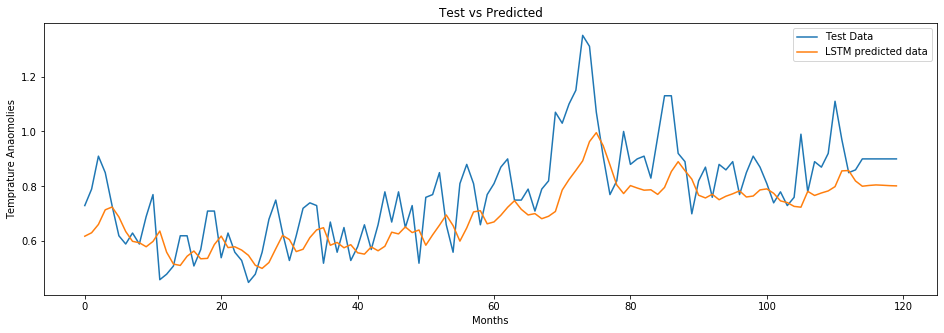

In [184]:
# Visualising the results
pyplot.figure(figsize=(16,5))
pyplot.plot(real_data, label = 'Test Data')
pyplot.plot(pred, label = 'LSTM predicted data')
pyplot.title('Test vs Predicted')
pyplot.xlabel('Months')
pyplot.ylabel('Temprature Anaomolies')
pyplot.legend()
pyplot.show()

In [185]:
mae = metrics.mean_absolute_error(test.Avg_Anomaly_deg_C,pred)
mse = metrics.mean_squared_error(test.Avg_Anomaly_deg_C,pred)
rmse = np.sqrt(metrics.mean_squared_error(test.Avg_Anomaly_deg_C,pred))


df_error_lstm = pd.DataFrame({'MAE' : [mae], 'MSE' : [mse],
                       'RMSE' : [rmse]}, index=[0])
df_error_lstm = df_error_lstm.melt()
df_error_lstm.columns =['Errors','LSTM']
df_error_lstm['LSTM'] = round(df_error_lstm['LSTM'],3)
df_error_lstm

,Errors,LSTM
0,MAE,0.109
1,MSE,0.019
2,RMSE,0.139


## COMPARING THE MODELS

We compare the models based on the errors: MAE, MSE and RMSE. 

MAE or Mean Absolute error gives a value to how close the predictions were to the eventual occurance.
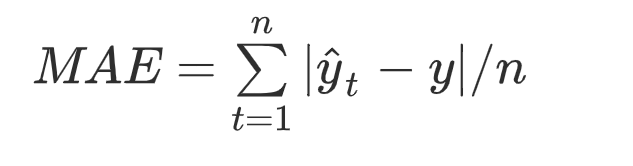

MSE or Mean Squared Error is the average of the squared errors. In other words it is the average squared difference between the estimated value and the actual value. 
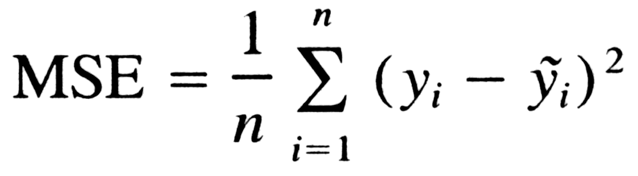

RMSE or Root Mean Squared Error is the square root of MSE and more accurate because it scales the error down to the scale of the target.
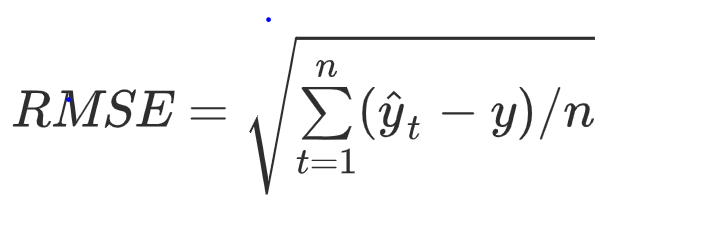


In [186]:
#combined dataframe of all the models
df_merged = df_error_aa
df_merged['fbprophet'] = df_error_fbp['fbprophet']
df_merged['LSTM'] = df_error_lstm['LSTM']
df_merged

,Errors,auto_arima,fbprophet,LSTM
0,MAE,0.155,0.120,0.109
1,MSE,0.038,0.025,0.019
2,RMSE,0.194,0.159,0.139


From the error comparison above, we can observe that LSTM has the best and least error values with MAE as low as 0.109 and RMSE 0.139

### Model Prediction Comparison

C:\Users\iyeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\iyeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\iyeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

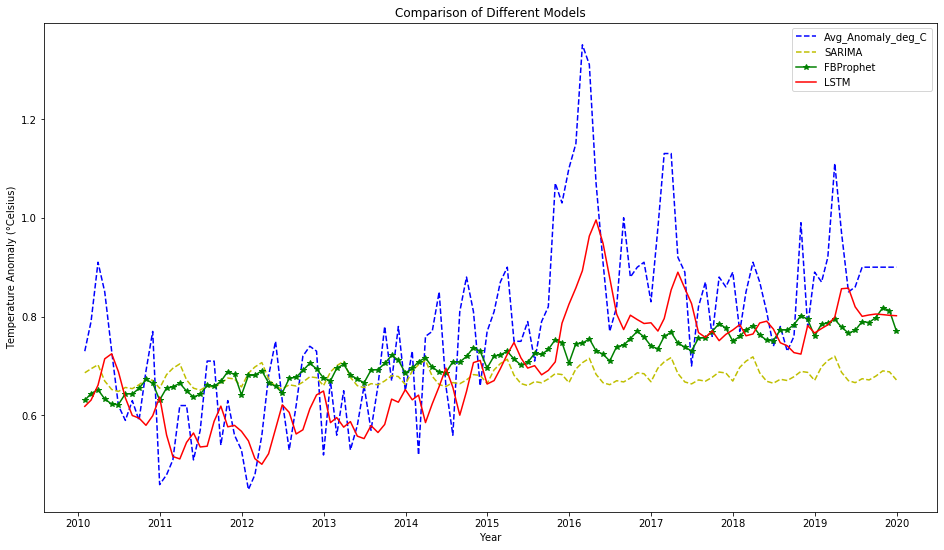

In [189]:
temp_test = test
temp_test['LSTM'] = pred
temp_test['ARIMA'] = future_forecast.Prediction.values
temp_test['FBProphet'] = test_forecast.yhat

# temp_test.drop(['LSTM_Predictions'], axis = 1, inplace = True)

temp_test.head()

pyplot.figure(figsize=(16,9))
pyplot.plot(temp_test.index, temp_test["Avg_Anomaly_deg_C"], 'b--', label = 'Avg_Anomaly_deg_C')
pyplot.plot(temp_test.index, temp_test["ARIMA"],'y--', label = 'SARIMA')
pyplot.plot(temp_test.index, temp_test["FBProphet"], 'g-*', label = 'FBProphet')
pyplot.plot(temp_test.index, temp_test["LSTM"],'red', label = 'LSTM')
pyplot.xlabel('Year')
pyplot.ylabel('Temperature Anomaly (°Celsius)')
pyplot.legend()
pyplot.title('Comparison of Different Models')
pyplot.show()

Here against the Actual value plot in blue, we see that LSTM's predictions in red are a better estimation than the other models.

## Conclusion and Future Scope

From our analysis, we understand that LSTM is a better fit to forecast rising temperatures and the trend is showing an upper movement. 

Rising temperatures have many environmental consequences mainly glacier melting in the poles, sea level increase and erratic climate change. With data-driven forecasts we can identify the sources to curb the factors like Carbon emission. 

Carbon emission being the most important factor and highly correlated to temperature increase, we identify its sources and along with the analysis used here, we can build a multivariate analysis for a data driven approach. 

The way to curb carbon emissions is by reducing the use of fossil fuel and increasing the use of sustainable energy resources like solar and wind energy. 

As a future scope, the Google Sunroof project dataset can be leveraged for not only identifying the ideal areas for installing solar panels but also identify the trend in increase of carbon offset with increase of solar energy utilization. 

### REFERENCE:

Brownlee, J. (2019, August 5). Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras. Retrieved from https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


Quick Start. (n.d.). Retrieved from https://facebook.github.io/prophet/docs/quick_start.html


pmdarima.arima.auto_arima — pmdarima 1.5.3 documentation. (n.d.). Retrieved February 15, 2020, from alkaline-ml.com website: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

statsmodels.tsa.stattools.grangercausalitytests — statsmodels. (n.d.). Retrieved February 15, 2020, from www.statsmodels.org website: https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html

statsmodels.tsa.stattools.adfuller — statsmodels v0.11.0dev0+265.gb3c5e2711 documentation. (2010). Retrieved from Statsmodels.org website: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

World Development Indicators | The World Bank. (n.d.). Retrieved February 15, 2020, from wdi.worldbank.org website: http://wdi.worldbank.org/table/3.8

Data.GISS:  GISS Surface Temperature Analysis, GISTEMP/v3. (2010). Retrieved from Nasa.gov website: https://data.giss.nasa.gov/gistemp/

Upcoming upgrade of GBL SST and MGR SST | OSI SAF. (n.d.). Retrieved February 15, 2020, from www.osi-saf.org website: http://www.osi-saf.org/?q=content/upcoming-upgrade-gbl-sst-and-mgr-sst
